In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip install keras==2.3.1

In [3]:
!pip install numpy==1.16.5

     |████████████████████████████████| 17.4MB 196kB/s 
ERROR: tensorflow 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: umap-learn 0.4.3 has requirement numpy>=1.17, but you'll have numpy 1.16.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4


In [0]:
import pickle

In [0]:
with open('./drive/My Drive/x_new.pkl', 'rb') as f:
    X_new = pickle.load(f)

In [0]:
with open('./drive/My Drive/y_new.pkl', 'rb') as f:
    y_new = pickle.load(f)

In [4]:
from keras.layers import Dense
from keras import Model
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

Using TensorFlow backend.


553467904/553467096 [==============================] - 16s 0us/step


In [5]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)
opt = Adam(lr=0.0001)
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [0]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [8]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

Epoch 1/1000
10/10 [==============================] - 10s 983ms/step - loss: 0.8655 - accuracy: 0.9062 - val_loss: 0.0233 - val_accuracy: 0.9688

Epoch 00001: val_loss improved from inf to 0.02333, saving model to ieeercnn_vgg16_1.h5
Epoch 2/1000
10/10 [==============================] - 2s 151ms/step - loss: 0.2222 - accuracy: 0.9031 - val_loss: 0.2424 - val_accuracy: 0.9062

Epoch 00002: val_loss did not improve from 0.02333
Epoch 3/1000
10/10 [==============================] - 4s 373ms/step - loss: 0.1468 - accuracy: 0.9375 - val_loss: 0.3378 - val_accuracy: 0.9219

Epoch 00003: val_loss did not improve from 0.02333
Epoch 4/1000
10/10 [==============================] - 4s 382ms/step - loss: 0.1715 - accuracy: 0.9375 - val_loss: 0.7180 - val_accuracy: 0.9531

Epoch 00004: val_loss did not improve from 0.02333
Epoch 5/1000
10/10 [==============================] - 4s 358ms/step - loss: 0.1294 - accuracy: 0.9625 - val_loss: 0.0639 - val_accuracy: 0.9844

Epoch 00005: val_loss did not imp

In [10]:
!pip install opencv-contrib-python

In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

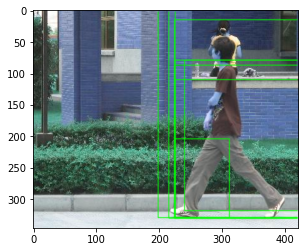

In [17]:
img = cv2.imread('./FudanPed00038.png')
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.70:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)